## **Tahap 1: Membaca dan Memahami Dataset (EDA Awal)**

In [6]:
# Import pustaka utama
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Membaca file Excel
df = pd.read_excel("sentimen_signal.xlsx")
df

,id,sumber,tanggal,komentar,label_sentimen
0,1,GooglePlay,2025-06-12,"Aplikasinya ringan, mudah digunakan buat bayar...",NaN
1,2,Instagram,2025-07-11,Sempat muncul notif tidak dapat didaftarkan ke...,NaN
2,3,GooglePlay,2025-07-11,"ada aplikasi signal mempermudah bayar stnk, ap...",NaN
3,4,GooglePlay,2025-07-09,"sudah 1 bulan pajak, bukti tanda pajak belum d...",NaN
4,5,GooglePlay,2025-05-28,saya daftar bacaannya data tidak sesuai lah pa...,NaN
...,...,...,...,...,...
102,103,GooglePlay,2025-05-01,"aplikasi sangat membantu, pembayaran pajak men...",NaN
103,104,GooglePlay,2025-06-12,"aplikasinya membantu, pengiriman cepat. Tapi t...",NaN
104,105,GooglePlay,2025-05-30,"terima kasih, dokumen sudah diterima.. walau m...",NaN
105,106,GooglePlay,2025-06-08,"GK perlu ribet antri, bayar parkir &ngeluarin ...",NaN


In [8]:
# Menampilkan 5 data teratas
print("5 Data Teratas:")
print(df.head())

5 Data Teratas:
   id      sumber    tanggal  \
0   1  GooglePlay 2025-06-12   
1   2   Instagram 2025-07-11   
2   3  GooglePlay 2025-07-11   
3   4  GooglePlay 2025-07-09   
4   5  GooglePlay 2025-05-28   

                                            komentar  label_sentimen  
0  Aplikasinya ringan, mudah digunakan buat bayar...             NaN  
1  Sempat muncul notif tidak dapat didaftarkan ke...             NaN  
2  ada aplikasi signal mempermudah bayar stnk, ap...             NaN  
3  sudah 1 bulan pajak, bukti tanda pajak belum d...             NaN  
4  saya daftar bacaannya data tidak sesuai lah pa...             NaN  


In [9]:
# Lihat nama kolom
print("\nNama Kolom:")
print(df.columns)


Nama Kolom:
Index(['id', 'sumber', 'tanggal', 'komentar', 'label_sentimen'], dtype='object')


In [10]:
# Struktur dan tipe data
print("\nStruktur DataFrame:")
df.info()


Struktur DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              107 non-null    int64         
 1   sumber          107 non-null    object        
 2   tanggal         107 non-null    datetime64[ns]
 3   komentar        107 non-null    object        
 4   label_sentimen  0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [11]:
# Jumlah total data
print("\nJumlah total data:", len(df))


Jumlah total data: 107


### **1.1 Cek Missing Values dan Duplikat**

In [12]:
# Cek missing values
print("\nMissing Values per Kolom:")
print(df.isnull().sum())

# Cek data duplikat
duplikat = df.duplicated()
print("\nJumlah Data Duplikat:", duplikat.sum())
if duplikat.sum() > 0:
    print("Data Duplikat:")
    print(df[duplikat])



Missing Values per Kolom:
id                  0
sumber              0
tanggal             0
komentar            0
label_sentimen    107
dtype: int64

Jumlah Data Duplikat: 0


### **1.2 Visualisasi Distribusi Sumber Komentar**

C:\Users\User\AppData\Local\Temp\ipykernel_6512\692203094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sumber', palette="Set2")


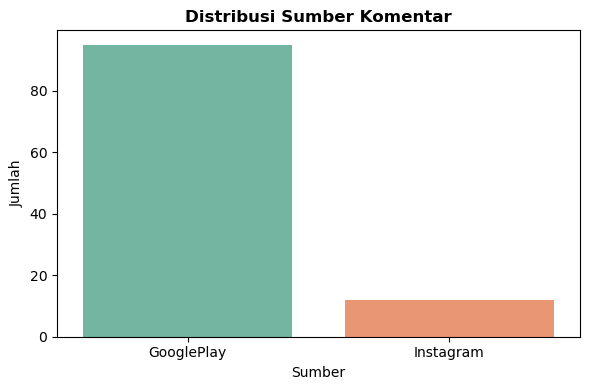

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sumber', palette="Set2")
plt.title('Distribusi Sumber Komentar', fontsize=12, weight='bold')
plt.xlabel('Sumber')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

### **1.3 Visualisasi Komentar per Tanggal**

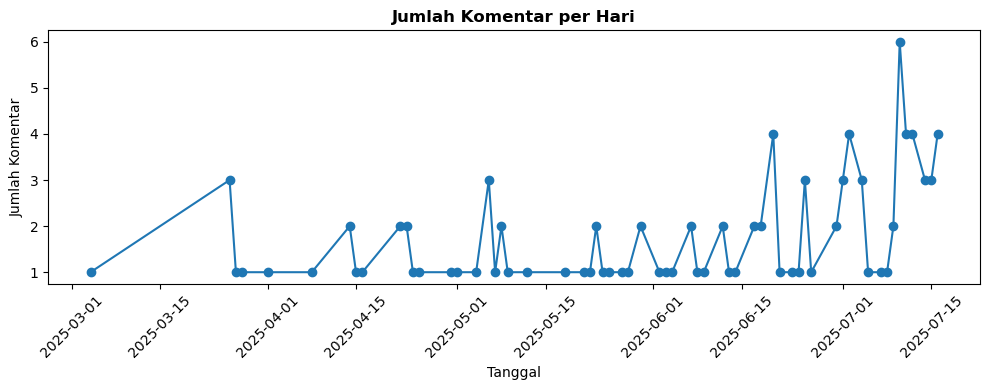

In [14]:
# Memastikan kolom tanggal dalam format datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Komentar per tanggal
plt.figure(figsize=(10,4))
df.groupby(df['tanggal'].dt.date).size().plot(kind='line', marker='o')
plt.title('Jumlah Komentar per Hari', fontsize=12, weight='bold')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **1.4 Distribusi Panjang Komentar**

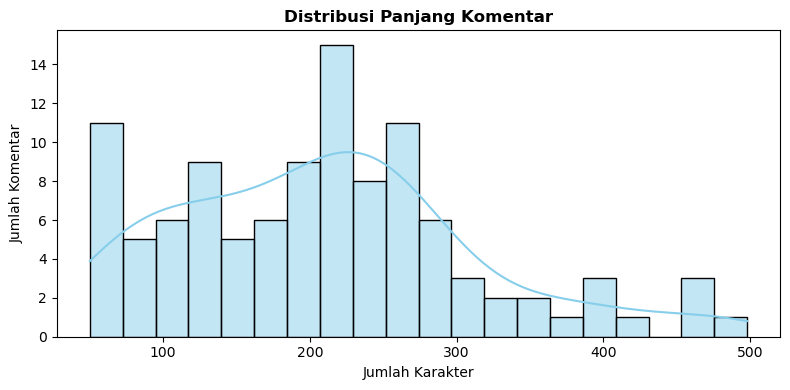

In [15]:
# Panjang karakter tiap komentar
df['panjang_komentar'] = df['komentar'].astype(str).apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df['panjang_komentar'], bins=20, kde=True, color='skyblue')
plt.title("Distribusi Panjang Komentar", fontsize=12, weight='bold')
plt.xlabel("Jumlah Karakter")
plt.ylabel("Jumlah Komentar")
plt.tight_layout()
plt.show()

## **Langkah 2: Preprocessing Awal**

### **2.1 Pembersihan Teks Komentar**

In [16]:
import re

# Bersihkan teks: lowercase dan hapus karakter non-alfanumerik
df['komentar_bersih'] = df['komentar'].astype(str).apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Tampilkan hasil
print(df[['komentar', 'komentar_bersih']].head(10))

                                            komentar  \
0  Aplikasinya ringan, mudah digunakan buat bayar...   
1  Sempat muncul notif tidak dapat didaftarkan ke...   
2  ada aplikasi signal mempermudah bayar stnk, ap...   
3  sudah 1 bulan pajak, bukti tanda pajak belum d...   
4  saya daftar bacaannya data tidak sesuai lah pa...   
5  Sangat membantu sekali , aplikasi simple , ga ...   
6  Sangat membantu aplikasi ini, buat masukan aja...   
7  Aplikasi ini sebenarnya sangat membantu bagi o...   
8  Perdana coba perpanjang STNK lewat Aplikasi Si...   
9  Pembayaran PKB sistem online, sangat membantu ...   

                                     komentar_bersih  
0  aplikasinya ringan mudah digunakan buat bayar ...  
1  sempat muncul notif tidak dapat didaftarkan ke...  
2  ada aplikasi signal mempermudah bayar stnk apa...  
3  sudah 1 bulan pajak bukti tanda pajak belum di...  
4  saya daftar bacaannya data tidak sesuai lah pa...  
5  sangat membantu sekali  aplikasi simple  ga ri... 

### **2.2 Tokenisasi + Stopword Removal**

In [17]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Unduh resource NLTK
nltk.download('punkt')
nltk.download('stopwords')

# 1. Membuat stopword (standar + tambahan kamus informal)
stop_nltk = set(stopwords.words('indonesian'))
stop_tambahan = {
    'aja', 'gak', 'dong', 'nih', 'nya', 'kalo', 'kayak', 'yg', 'ya', 'deh', 'loh', 'lho', 
    'ga', 'gk', 'sih', 'lah', 'si', 'tuh', 'aplikasi', 'app', 'apps', 'signal', 'samsat'
}
stop_all = stop_nltk.union(stop_tambahan)

# 2. Fungsi untuk membersihkan dan tokenisasi
def preprocessing_komentar(teks):
    teks = teks.lower()  # lowercase
    teks = re.sub(r'[^a-zA-Z\s]', '', teks)  # hapus angka dan tanda baca
    tokens = word_tokenize(teks)  # tokenisasi
    tokens_bersih = [token for token in tokens if token not in stop_all and token.isalpha()]  # stopword removal
    return ' '.join(tokens_bersih)

# 3. Terapkan ke kolom komentar
df['komentar_bersih'] = df['komentar'].astype(str).apply(preprocessing_komentar)

# 4. Cek hasil
print(df[['komentar', 'komentar_bersih']].head(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            komentar  \
0  Aplikasinya ringan, mudah digunakan buat bayar...   
1  Sempat muncul notif tidak dapat didaftarkan ke...   
2  ada aplikasi signal mempermudah bayar stnk, ap...   
3  sudah 1 bulan pajak, bukti tanda pajak belum d...   
4  saya daftar bacaannya data tidak sesuai lah pa...   
5  Sangat membantu sekali , aplikasi simple , ga ...   
6  Sangat membantu aplikasi ini, buat masukan aja...   
7  Aplikasi ini sebenarnya sangat membantu bagi o...   
8  Perdana coba perpanjang STNK lewat Aplikasi Si...   
9  Pembayaran PKB sistem online, sangat membantu ...   

                                     komentar_bersih  
0  aplikasinya ringan mudah bayar pajak pengesaha...  
1  muncul notif didaftarkan proses pendaftaran pe...  
2  mempermudah bayar stnk tinggal kota pakai efis...  
3  pajak bukti tanda pajak dikirim transaksi toko...  
4  daftar bacaannya data sesuai daftar pake ktp a...  
5  membantu simple ribet proses cepat tambahkan f... 

In [18]:
all_words = ' '.join(df['komentar_bersih']).split()
unique_words = set([word.lower() for word in all_words if word.isalpha()])
unique_words

{'abang',
 'adaiin',
 'adain',
 'adaitupun',
 'adakan',
 'admin',
 'adminnya',
 'ajj',
 'akses',
 'akun',
 'alamat',
 'alasan',
 'alhamdulillah',
 'alhasil',
 'alias',
 'all',
 'aman',
 'ambil',
 'ampun',
 'anak',
 'antri',
 'apapun',
 'apk',
 'aplikasinya',
 'arahan',
 'are',
 'asik',
 'asli',
 'aslinya',
 'axa',
 'bacaannya',
 'bad',
 'bagus',
 'bagusthanks',
 'baiknya',
 'banget',
 'bank',
 'banking',
 'banyaknya',
 'barang',
 'barcode',
 'bayak',
 'bayar',
 'bea',
 'bekas',
 'beli',
 'bener',
 'bentuk',
 'ber',
 'berangkat',
 'berbeda',
 'berkala',
 'berkas',
 'berkembang',
 'bermasalah',
 'bermotor',
 'bermotormenghemat',
 'bersamaan',
 'bertanggung',
 'berulang',
 'best',
 'bgt',
 'biar',
 'biaya',
 'bikin',
 'bingung',
 'biro',
 'bisanamun',
 'bisasedangkan',
 'bisaverifikasi',
 'blom',
 'blum',
 'bolak',
 'bold',
 'bosku',
 'bs',
 'buffering',
 'bug',
 'bukti',
 'buruk',
 'byr',
 'capek',
 'capekcapek',
 'cari',
 'cek',
 'cepat',
 'cepet',
 'cetak',
 'chat',
 'chattroomnya',
 '

### **2.3 Visualisasi Kata Terbanyak**

C:\Users\User\AppData\Local\Temp\ipykernel_6512\1814881152.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kata_df.head(20), x='jumlah', y='kata', palette='viridis')


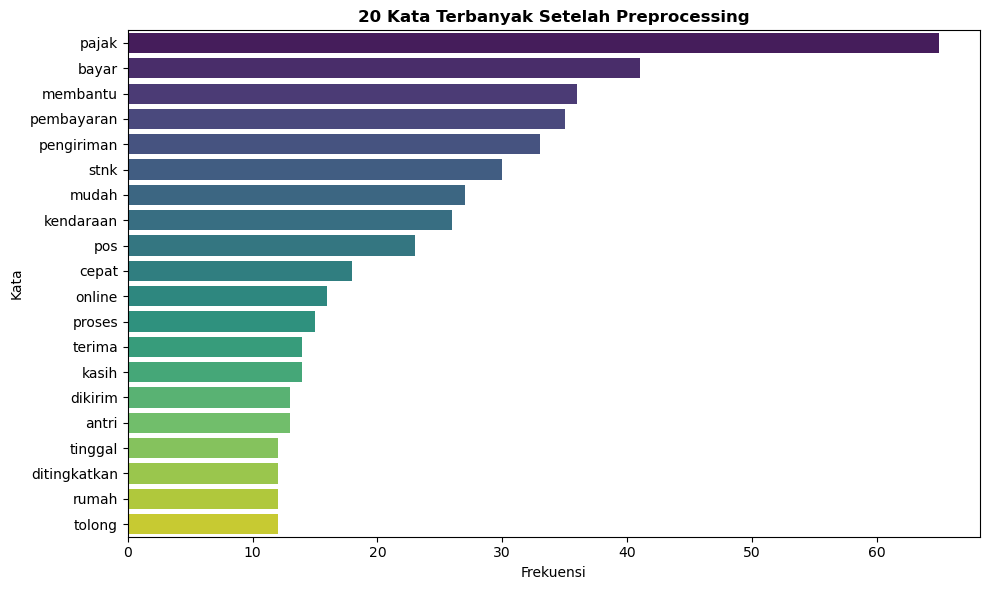

In [19]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menggabungkan semua kata jadi satu list
all_words = ' '.join(df['komentar_bersih']).split()

# Hitung frekuensi kata
kata_terbanyak = Counter(all_words).most_common(50)

# Ubah ke DataFrame
kata_df = pd.DataFrame(kata_terbanyak, columns=['kata', 'jumlah'])

# Visualisasi Barplot
plt.figure(figsize=(10,6))
sns.barplot(data=kata_df.head(20), x='jumlah', y='kata', palette='viridis')
plt.title('20 Kata Terbanyak Setelah Preprocessing', fontsize=12, weight='bold')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.tight_layout()
plt.show()

## **Langkah 3: Tokenisasi, Stopword, dan Stemming Bahasa Indonesia**

In [20]:
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import string

# Download nltk stopword
nltk.download('stopwords')

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stopword Bahasa Indonesia + tambahan informal
stop_words = set(stopwords.words('indonesian'))
tambahan_stopwords = ['aja', 'gak', 'dong', 'nih', 'nya', 'kalo', 'kayak', 'yg', 'ya', 'deh', 'loh', 'lho']
stop_words.update(tambahan_stopwords)

# Fungsi bersih total: tokenisasi + stopword removal + stemming
def preprocessing_teks(teks):
    # 1. Lowercase
    teks = teks.lower()
    
    # 2. Hapus tanda baca dan angka
    teks = ''.join([char for char in teks if char not in string.punctuation and not char.isdigit()])
    
    # 3. Tokenisasi manual (split)
    tokens = teks.split()
    
    # 4. Hapus stopwords
    tokens_bersih = [kata for kata in tokens if kata not in stop_words]
    
    # 5. Stemming
    hasil_stemming = [stemmer.stem(kata) for kata in tokens_bersih]
    
    return ' '.join(hasil_stemming)

# Terapkan ke DataFrame
df['teks_final'] = df['komentar_bersih'].apply(preprocessing_teks)

# Lihat hasil
print(df[['komentar', 'komentar_bersih', 'teks_final']].head(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            komentar  \
0  Aplikasinya ringan, mudah digunakan buat bayar...   
1  Sempat muncul notif tidak dapat didaftarkan ke...   
2  ada aplikasi signal mempermudah bayar stnk, ap...   
3  sudah 1 bulan pajak, bukti tanda pajak belum d...   
4  saya daftar bacaannya data tidak sesuai lah pa...   
5  Sangat membantu sekali , aplikasi simple , ga ...   
6  Sangat membantu aplikasi ini, buat masukan aja...   
7  Aplikasi ini sebenarnya sangat membantu bagi o...   
8  Perdana coba perpanjang STNK lewat Aplikasi Si...   
9  Pembayaran PKB sistem online, sangat membantu ...   

                                     komentar_bersih  \
0  aplikasinya ringan mudah bayar pajak pengesaha...   
1  muncul notif didaftarkan proses pendaftaran pe...   
2  mempermudah bayar stnk tinggal kota pakai efis...   
3  pajak bukti tanda pajak dikirim transaksi toko...   
4  daftar bacaannya data sesuai daftar pake ktp a...   
5  membantu simple ribet proses cepat tambahkan

# **Langkah 4: Pelabelan Sentimen**

In [21]:
# Install Library
!pip install transformers torch

### **4.1 Import dan Load Model IndoBERT Sentiment**

In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load tokenizer dan model IndoBERT Sentiment
model_name = "mdhugol/indonesia-bert-sentiment-classification"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


### **4.2 Membuat Fungsi untuk Memprediksi Sentimen**

In [23]:
# Buat label hasil prediksi
custom_id2label = {0: 'positive', 1: 'neutral', 2: 'negative'}

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    return custom_id2label[predicted_class]


### **4.3 Terapkan Fungsi ke Semua Komentar**

In [ ]:
df['label_sentimen'] = df['komentar'].apply(predict_sentiment)

# Mapping ke label angka
label_to_index = {
    'positive': 0,
    'neutral': 1,
    'negative': 2
}

df['label_index'] = df['label_sentimen'].map(label_to_index)

# Baca Hasil Fungsi
print(df[['komentar', 'label_sentimen', 'label_index']].head(10))

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


                                            komentar label_sentimen  \
0  Aplikasinya ringan, mudah digunakan buat bayar...       positive   
1  Sempat muncul notif tidak dapat didaftarkan ke...        neutral   
2  ada aplikasi signal mempermudah bayar stnk, ap...       positive   
3  sudah 1 bulan pajak, bukti tanda pajak belum d...       positive   
4  saya daftar bacaannya data tidak sesuai lah pa...       negative   
5  Sangat membantu sekali , aplikasi simple , ga ...       positive   
6  Sangat membantu aplikasi ini, buat masukan aja...       positive   
7  Aplikasi ini sebenarnya sangat membantu bagi o...       positive   
8  Perdana coba perpanjang STNK lewat Aplikasi Si...        neutral   
9  Pembayaran PKB sistem online, sangat membantu ...       positive   

   label_index  
0            0  
1            1  
2            0  
3            0  
4            2  
5            0  
6            0  
7            0  
8            1  
9            0  


### **4.4 Menampilkan 5 Contoh Komentar per Sentimen**

In [26]:
# POSITIF
print("Contoh komentar POSITIF:\n")
print(df[df['label_sentimen'] == 'positive']['komentar'].head(5))

# NETRAL
print("\nContoh komentar NETRAL:\n")
print(df[df['label_sentimen'] == 'neutral']['komentar'].head(5))

# NEGATIF
print("\nContoh komentar NEGATIF:\n")
print(df[df['label_sentimen'] == 'negative']['komentar'].head(5))

Contoh komentar POSITIF:

0    Aplikasinya ringan, mudah digunakan buat bayar...
2    ada aplikasi signal mempermudah bayar stnk, ap...
3    sudah 1 bulan pajak, bukti tanda pajak belum d...
5    Sangat membantu sekali , aplikasi simple , ga ...
6    Sangat membantu aplikasi ini, buat masukan aja...
Name: komentar, dtype: object

Contoh komentar NETRAL:

1     Sempat muncul notif tidak dapat didaftarkan ke...
8     Perdana coba perpanjang STNK lewat Aplikasi Si...
13    kenapa bayar pajak motor pakai signal, pas nar...
15    mohon untuk dibenahi kembali dibagian pelacaka...
16    Bagi orang yang tidak ada waktu untuk mengurus...
Name: komentar, dtype: object

Contoh komentar NEGATIF:

4     saya daftar bacaannya data tidak sesuai lah pa...
10    malah di buat pusing, mau masukkan data kk mal...
12    saya mau lewat online tapi eror aplikasi nya m...
19    aplikasi buruk, jika data tidak sesuai bisa di...
20    masih banyak kekurangan dalam pelayanan publik...
Name: komentar, dtype: obj

### **4.5 Simpan Hasil Pelabelan ke Excel**

In [29]:
# Buat salinan tanpa kolom 'tanggal'
df_tanpa_tanggal = df.drop(columns=['tanggal'])

# Simpan ke Excel
df_tanpa_tanggal.to_excel("hasil_analisis_sentimen.xlsx", index=False)

print("✅ File berhasil disimpan tanpa kolom 'tanggal'.")

✅ File berhasil disimpan tanpa kolom 'tanggal'.


In [36]:
# Cek Daftar Kolom yang tersedia Sekarang  :
print(df.columns)

Index(['id', 'sumber', 'tanggal', 'komentar', 'label_sentimen',
       'panjang_komentar', 'komentar_bersih', 'teks_final', 'label_index'],
      dtype='object')


In [37]:
# Lihat isi kolom komentar, komentar bersih, & komentar final
df[['komentar', 'komentar_bersih', 'teks_final']].head()

,komentar,komentar_bersih,teks_final
0,"Aplikasinya ringan, mudah digunakan buat bayar...",aplikasinya ringan mudah bayar pajak pengesaha...,aplikasi ringan mudah bayar pajak kesah pilih ...
1,Sempat muncul notif tidak dapat didaftarkan ke...,muncul notif didaftarkan proses pendaftaran pe...,muncul notif daftar proses daftar kesah stnk p...
2,"ada aplikasi signal mempermudah bayar stnk, ap...",mempermudah bayar stnk tinggal kota pakai efis...,mudah bayar stnk tinggal kota pakai efisien bo...
3,"sudah 1 bulan pajak, bukti tanda pajak belum d...",pajak bukti tanda pajak dikirim transaksi toko...,pajak bukti tanda pajak kirim transaksi toko i...
4,saya daftar bacaannya data tidak sesuai lah pa...,daftar bacaannya data sesuai daftar pake ktp a...,daftar baca data sesuai daftar pake ktp asli g...


# **Langkah 5 : Visualisasi**

 ### **5.1 Barplot Jumlah Komentar per Kategori Sentimen**

C:\Users\User\AppData\Local\Temp\ipykernel_6512\768690144.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label_sentimen', palette='Set2')


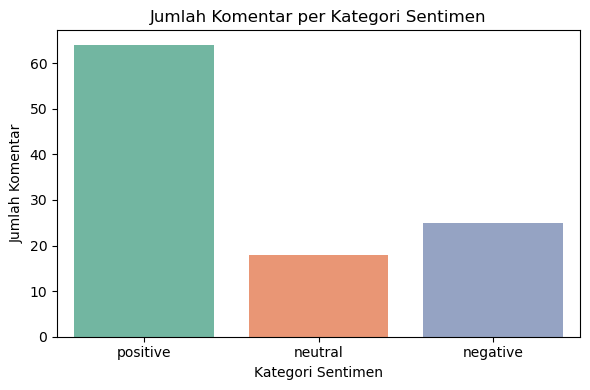

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label_sentimen', palette='Set2')
plt.title('Jumlah Komentar per Kategori Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Komentar')
plt.tight_layout()
plt.show()

### **5.2 WordCloud per Kategori Sentimen**

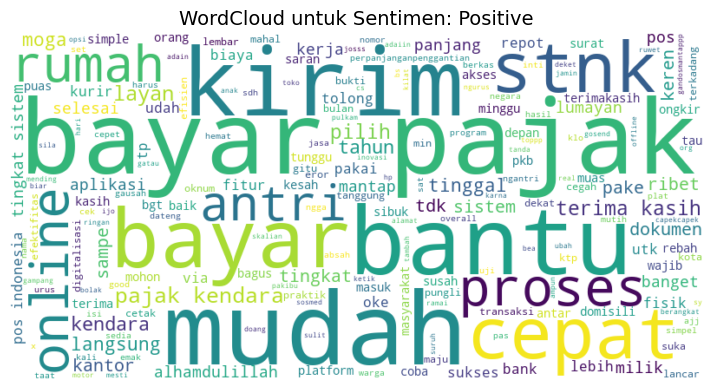

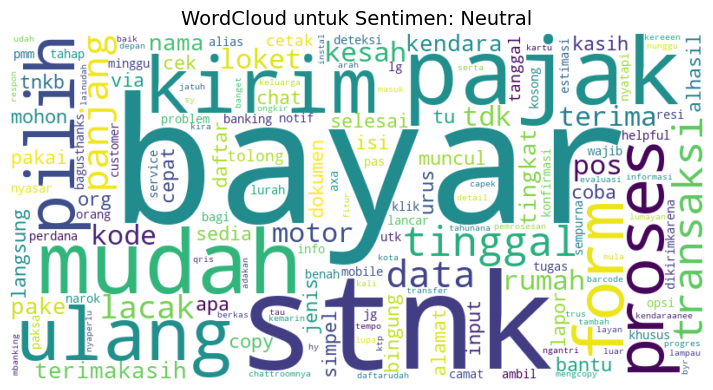

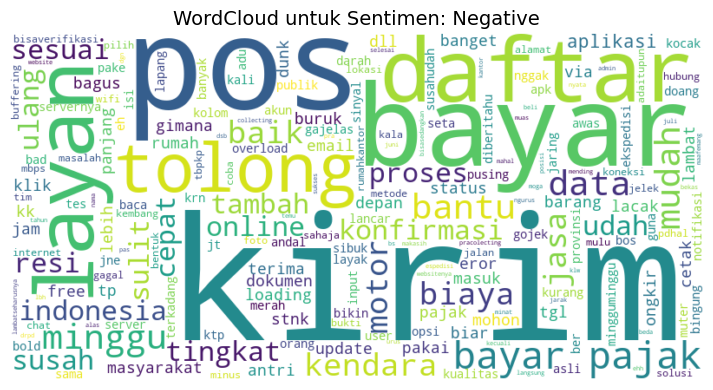

In [38]:
from wordcloud import WordCloud

# Wordcloud kolom teks final
kategori = ['positive', 'neutral', 'negative']

for kat in kategori:
    text = ' '.join(df[df['label_sentimen'] == kat]['teks_final'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud untuk Sentimen: {kat.capitalize()}', fontsize=14)
    plt.tight_layout()
    plt.show()

### **5.3 Statistik per Kategori**

In [32]:
# Proporsi jumlah komentar
proporsi = df['label_sentimen'].value_counts(normalize=True) * 100
print("Proporsi Komentar per Sentimen (%):")
print(proporsi.round(2))

# Rata-rata panjang komentar per sentimen
df['panjang_komentar'] = df['komentar'].apply(lambda x: len(str(x).split()))
rata_rata = df.groupby('label_sentimen')['panjang_komentar'].mean()
print("\nRata-rata Panjang Komentar per Sentimen (dalam jumlah kata):")
print(rata_rata.round(2))

Proporsi Komentar per Sentimen (%):
label_sentimen
positive    59.81
negative    23.36
neutral     16.82
Name: proportion, dtype: float64

Rata-rata Panjang Komentar per Sentimen (dalam jumlah kata):
label_sentimen
negative    32.40
neutral     32.83
positive    30.70
Name: panjang_komentar, dtype: float64
